In [1]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import average_precision_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../../data/INSECTS/INSECTS_Abr.csv.gz")

X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [3]:
params = {
    "objective": "binary",
    "metric": "binary_logloss",
    "boosting_type": "gbdt",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
}

# Train the model
bst = lgb.train(
    params,
    train_data,
    num_boost_round=100,
    valid_sets=[test_data],
)

# Prediction
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

[LightGBM] [Info] Number of positive: 425, number of negative: 35229
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8415
[LightGBM] [Info] Number of data points in the train set: 35654, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.011920 -> initscore=-4.417536
[LightGBM] [Info] Start training from score -4.417536


AUROC: 0.966


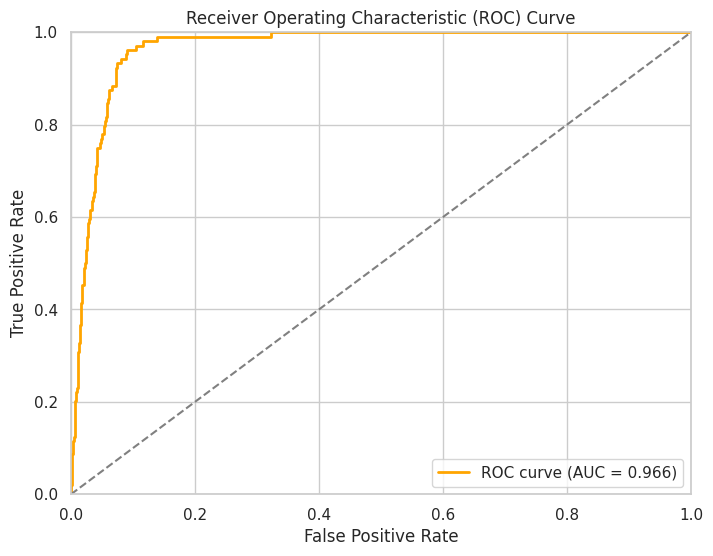

In [4]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
auroc_score = roc_auc_score(y_test, y_pred)
print(f"AUROC: {auroc_score:0.3f}")

# Visualize ROC Curve
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

plt.plot(fpr, tpr, color="orange", lw=2, label=f"ROC curve (AUC = {auroc_score:0.3f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

AUPRC: 0.199


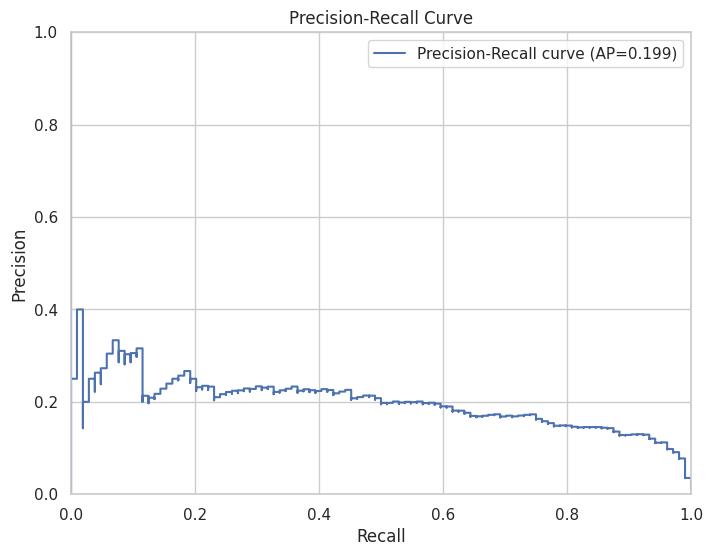

In [5]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
print(f"AUPRC: {average_precision:0.3f}")

# Visualize Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, where="post", label=f"Precision-Recall curve (AP={average_precision:0.3f})")

plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()